2025-02-03 05:54:47.969662: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 05:54:47.972654: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 05:54:47.980585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738562087.993987   36042 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738562087.997739   36042 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 05:54:48.012355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Null values in the dataset:
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3634
AMT_REQ_CREDIT_BUREAU_WEEK    3634
AMT_REQ_CREDIT_BUREAU_MON     3634
AMT_REQ_CREDIT_BUREAU_QRT     3635
AMT_REQ_CREDIT_BUREAU_YEAR    3635
Length: 122, dtype: int64

Percentage of default (1) vs non-default (0):
TARGET
0    91.993669
1     8.006331
Name: proportion, dtype: float64


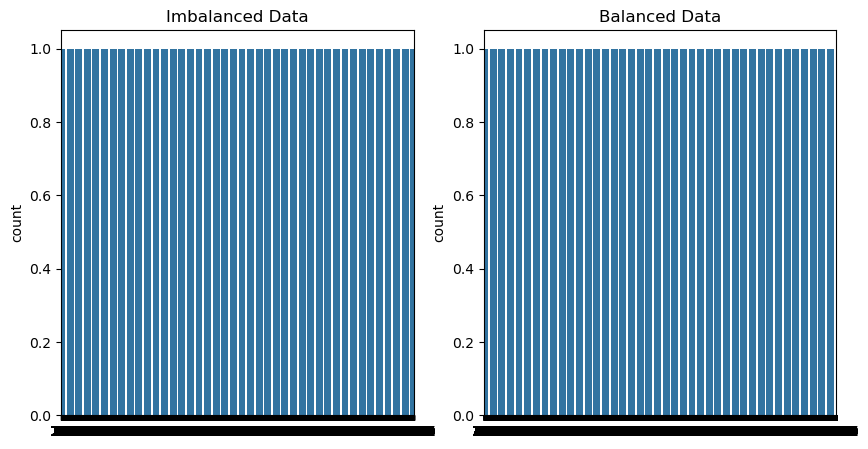

Epoch 1/20


/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-03 06:00:05.090262: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6060 - loss: 0.6786 - val_accuracy: 0.8301 - val_loss: 0.3953
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8190 - loss: 0.4322 - val_accuracy: 0.8487 - val_loss: 0.3574
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3971 - val_accuracy: 0.8556 - val_loss: 0.3457
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8451 - loss: 0.3766 - val_accuracy: 0.8578 - val_loss: 0.3326
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3600 - val_accuracy: 0.8626 - val_loss: 0.3269
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3514 - val_accuracy: 0.8651 - val_loss: 0.3235
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3346 - val_accuracy: 0.8713 - val_loss: 0.3125
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.3256 - val_accuracy: 0.8740 - val_

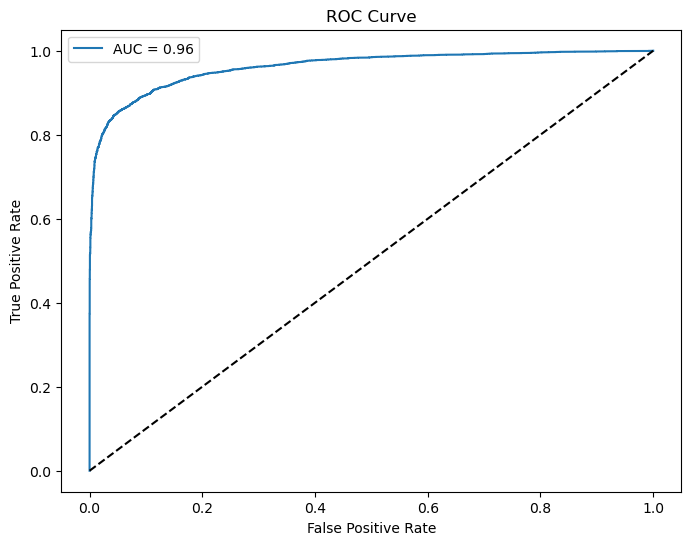

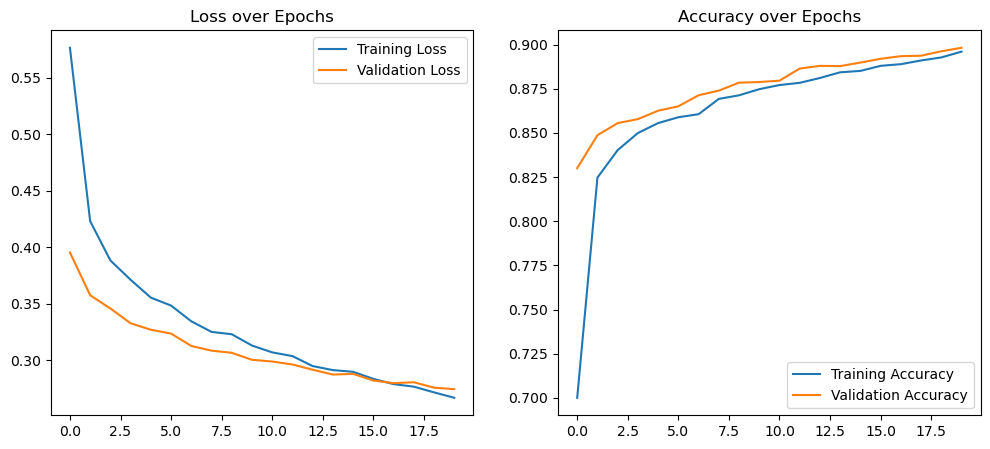

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Load the dataset
data = pd.read_csv('loan_data.csv')

# Step 2: Check for null values
print("Null values in the dataset:")
print(data.isnull().sum())

# Step 3: Print the percentage of default to payer
default_percentage = data['TARGET'].value_counts(normalize=True) * 100
print("\nPercentage of default (1) vs non-default (0):")
print(default_percentage)

# Step 4: Balance the dataset if imbalanced
# Since the dataset is highly imbalanced, we will use SMOTE to balance it
X = data.drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop target and ID columns
y = data['TARGET']

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values (fill with median for numerical columns)
X = X.fillna(X.median())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 5: Plot the balanced or imbalanced data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(y)
plt.title('Imbalanced Data')
plt.subplot(1, 2, 2)
sns.countplot(y_balanced)
plt.title('Balanced Data')
plt.show()

# Step 6: Encode the columns required for the model (already done above)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build a deep learning model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)

# Step 9: Evaluate the model
# Predict probabilities
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate sensitivity (recall)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 10: Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

